<a href="https://colab.research.google.com/github/JuanArmas/BigData7RO/blob/main/Prueba_tensor_flow_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Actividad basada en el trabajo del creador de contenido Ringa Tech.
- Fuente: https://www.youtube.com/watch?v=JpE4bYyRADI

Modificaciones añadidas:
- Crear una función de conversión y generación de un dataset .csv con 1000 temperaturas.
- Dividir los datos en 80% training y 20% test. Los datos de trainning reserva un 5% para validación.
- Mostrar las gráficas de pérdida y precisión.

Por Juan Airam Armas Alemán


In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Función para convertir Celsius a Fahrenheit
def celsius_to_fahrenheit(celsius):
    return celsius * 9/5 + 32

In [3]:
# Generamos datos y guardamos en CSV
celsius_data = np.random.uniform(low=-100, high=100, size=(1000,))
fahrenheit_data = celsius_to_fahrenheit(celsius_data)
df = pd.DataFrame({'Celsius': celsius_data, 'Fahrenheit': fahrenheit_data})
df.to_csv('temperatures.csv', index=False)

In [4]:
# Dividimos los datos en conjuntos de entrenamiento, validación y prueba
X_train, X_test, y_train, y_test = train_test_split(df['Celsius'], df['Fahrenheit'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.05, random_state=42)

In [5]:
# Definimos el modelo
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

modelo.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss='mean_squared_error')

# Entrenar el modelo
print("Comenzando entrenamiento...")
historial = modelo.fit(X_train, y_train, epochs=300, validation_data=(X_val, y_val), verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


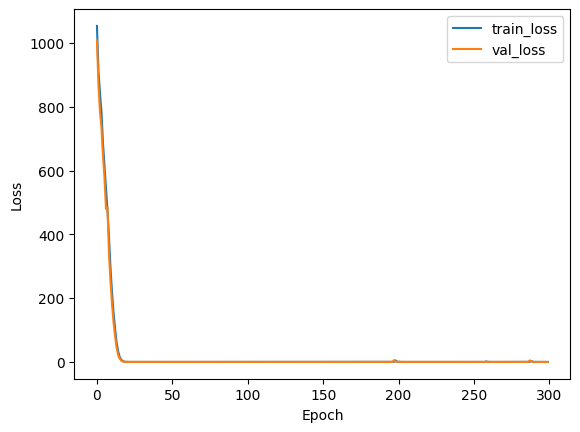

In [6]:
# Mostramos gráficas de pérdida y precisión
plt.plot(historial.history['loss'], label='train_loss')
plt.plot(historial.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [7]:
# Evaluamos el modelo en el conjunto de prueba
test_loss = modelo.evaluate(X_test, y_test)
print("Pérdida en el conjunto de prueba:", test_loss)

7/7 [==============================] - 0s 2ms/step - loss: 1.4908e-07
Pérdida en el conjunto de prueba: 1.4908295042914688e-07


In [8]:
#Exportamos el modelo en formato h5
modelo.save('celsius_a_fahrenheit.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
#Para convertirlo a tensorflow.js, primero debemos instalar la libreria
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 74.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 94.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 90.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 87.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 69.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 34.7 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0
  Attempting uninstall: ml-dtypes
    

In [12]:
#Creamos la carpeta donde se colocaran los archivos resultantes
!mkdir carpeta_salida

mkdir: cannot create directory ‘carpeta_salida’: File exists


In [13]:
#Realizamos la exportacion a la carpeta de salida
!tensorflowjs_converter --input_format keras celsius_a_fahrenheit.h5 carpeta_salida

2024-05-01 19:10:42.023377: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
